<a href="https://colab.research.google.com/github/maciejskorski/deep_correlations_trng/blob/main/notebooks/autocorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pip --quiet
!git clone https://github.com/maciejskorski/deep_correlations_trng.git --quiet
%cd deep_correlations_trng
!pip install . --quiet

fatal: destination path 'deep_correlations_trng' already exists and is not an empty directory.
/content/deep_correlations_trng
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
try:
    from importlib.resources import files
except:
    from importlib_resources import files
from deep_correlations_trng.utils import read_bits
from deep_correlations_trng import data

data_file = files(data).joinpath('acq_20220608163343_all_dff_out1.bin')
bits = read_bits(data_file)

In [3]:
import numpy as np
from scipy.stats import pearsonr

lags = np.arange(0,10)*50

results = []
for lag in lags:
  if lag == 0:
    r = (1,0)
  else:
    r = pearsonr(bits[lag:],bits[:-lag])
  results.append((lag,)+tuple(r))

Text(0, 0.5, 'autocorrelation')

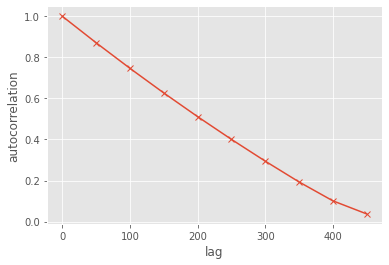

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.plot(lags,np.array(results)[:,1],marker='x')
ax.set_xlabel('lag')
ax.set_ylabel('autocorrelation')